# Capstone Project (Market Basket Analysis)

# Loading Packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import os
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Importing Cleaned data

In [3]:
My_data = pd.read_csv('New_Transcations_Records.csv')
My_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Date,Invoice_Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00.0000000,2.55,17850,United Kingdom,2010-12-01,08:26:00.0000000
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00.0000000,3.39,17850,United Kingdom,2010-12-01,08:26:00.0000000
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00.0000000,2.75,17850,United Kingdom,2010-12-01,08:26:00.0000000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00.0000000,3.39,17850,United Kingdom,2010-12-01,08:26:00.0000000
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00.0000000,3.39,17850,United Kingdom,2010-12-01,08:26:00.0000000


In [4]:
# Size of the Data
My_data.shape

(405633, 10)

In [5]:
#Data Preprocessing
# Checking for Null Values
My_data.isnull().sum()

InvoiceNo       0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
UnitPrice       0
CustomerID      0
Country         0
Invoice_Date    0
Invoice_Time    0
dtype: int64

In [6]:
My_data.dtypes

InvoiceNo        object
StockCode        object
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
Invoice_Date     object
Invoice_Time     object
dtype: object

# Exploratory Data Analysis (EDA) On the Dataset.

### Number of Records as per the Country

In [7]:
My_data['Country'].value_counts()

United Kingdom          361792
Germany                   9112
France                    8180
EIRE                      7485
Spain                     2471
Netherlands               2332
Belgium                   1971
Switzerland               1844
Portugal                  1450
Australia                 1257
Norway                    1066
Italy                      785
Channel Islands            758
Finland                    654
Cyprus                     621
Sweden                     438
Austria                    387
Denmark                    375
Japan                      358
Poland                     336
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     150
Greece                     142
Malta                      123
United Arab Emirates        67
European Community          58
RSA                         58
Lebanon                     45
Lithuani

In [8]:
# The Total Number of Countries The Company is working in

"The Number of Countries are :" + str(My_data['Country'].nunique())

'The Number of Countries are :37'

### Analyze the sales performance of the Company

In [9]:
Total_Amount = My_data['Quantity'] * My_data['UnitPrice']
My_data.insert(loc=7, column='TotalAmount', value=Total_Amount)

In [10]:
My_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalAmount,Country,Invoice_Date,Invoice_Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00.0000000,2.55,17850,15.30,United Kingdom,2010-12-01,08:26:00.0000000
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00.0000000,3.39,17850,20.34,United Kingdom,2010-12-01,08:26:00.0000000
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00.0000000,2.75,17850,22.00,United Kingdom,2010-12-01,08:26:00.0000000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00.0000000,3.39,17850,20.34,United Kingdom,2010-12-01,08:26:00.0000000
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00.0000000,3.39,17850,20.34,United Kingdom,2010-12-01,08:26:00.0000000


### Total Revenue of the Company according to the Countries

In [11]:
#  Grouping Countries by TotalAmount Of The Sales

country_price = My_data.groupby('Country')['TotalAmount'].sum().sort_values(ascending = False)
country_price

Country
United Kingdom          6768627.364
Netherlands              283167.540
EIRE                     250285.220
Germany                  200877.210
France                   181647.840
Australia                136990.000
Switzerland               51859.400
Spain                     48922.580
Belgium                   36662.960
Japan                     35340.620
Sweden                    35206.910
Norway                    32292.960
Portugal                  26551.810
Channel Islands           20086.290
Finland                   18854.740
Denmark                   18042.140
Italy                     15245.510
Cyprus                    12931.290
Singapore                  9120.390
Austria                    8698.320
Israel                     6994.250
Poland                     6853.140
Greece                     4425.520
Iceland                    4310.000
Canada                     3115.440
Unspecified                2667.070
Malta                      1980.470
United Arab Emirates

### Top 5 Countries which the companies have highest sales

Text(0, 0.5, 'TotalAmount')

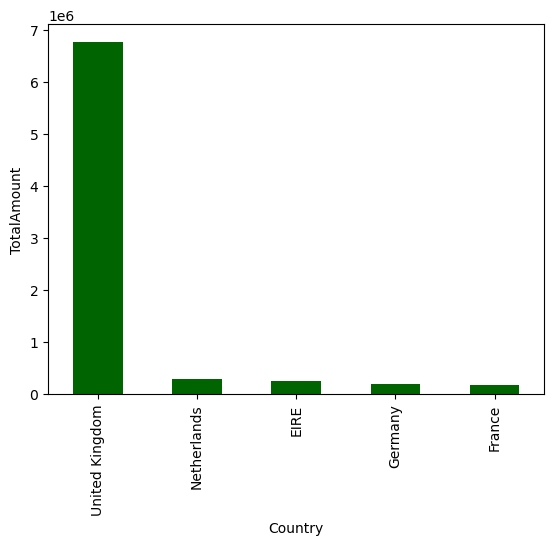

In [12]:
# Top 5 Countries which the companies have highest sales
country_price[:5].plot(kind = 'bar',color = 'darkgreen')
plt.pyplot.ylabel('TotalAmount')

 ### 5 Countries which the companies have lowest sales

Text(0, 0.5, 'TotalAmount')

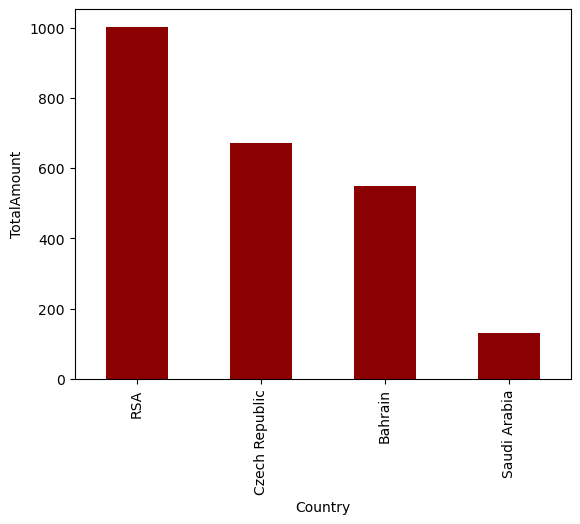

In [13]:
 # 5 Countries which the companies have lowest sales
country_price[33:].plot(kind = 'bar', color='darkred')
plt.pyplot.ylabel('TotalAmount')

### Why these Countries have low Sales ?

### Countries with less number of customers

<AxesSubplot:title={'center':'Least Customers for Country'}, xlabel='Country'>

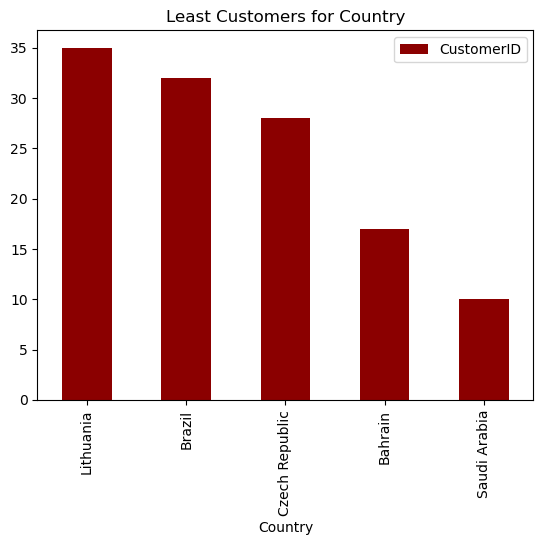

In [14]:
# Countries with less number of customers

cus_id = pd.DataFrame(My_data.groupby('Country')['CustomerID'].count().sort_values(ascending = False))
cus_id[-5:].plot(kind = 'bar',title = 'Least Customers for Country', color='darkred')

<AxesSubplot:title={'center':'Highest Customers for Country'}, xlabel='Country'>

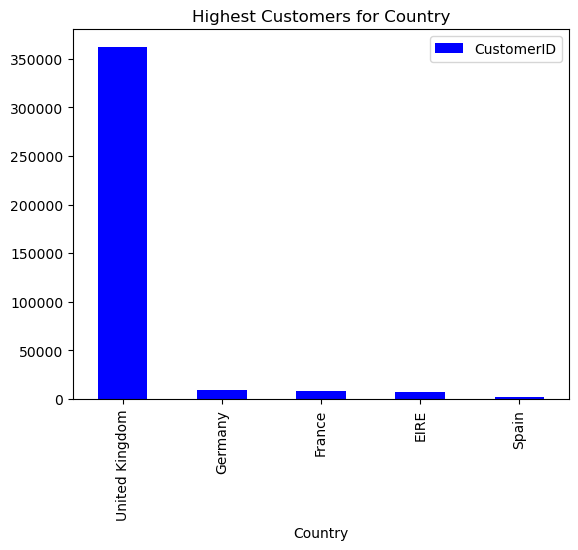

In [17]:
cus_id[:5].plot(kind = 'bar',title = 'Highest Customers for Country', color='blue')

In [14]:
# Adding Year feature to the Dataset
My_data['InvoiceDate'] = pd.to_datetime(My_data['InvoiceDate'])
timest = My_data['InvoiceDate'].dt.year
My_data['Year'] = timest
My_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalAmount,Country,Invoice_Date,Invoice_Time,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,15.30,United Kingdom,2010-12-01,08:26:00.0000000,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,20.34,United Kingdom,2010-12-01,08:26:00.0000000,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,22.00,United Kingdom,2010-12-01,08:26:00.0000000,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,20.34,United Kingdom,2010-12-01,08:26:00.0000000,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,20.34,United Kingdom,2010-12-01,08:26:00.0000000,2010


Text(0, 0.5, 'TotalAmount')

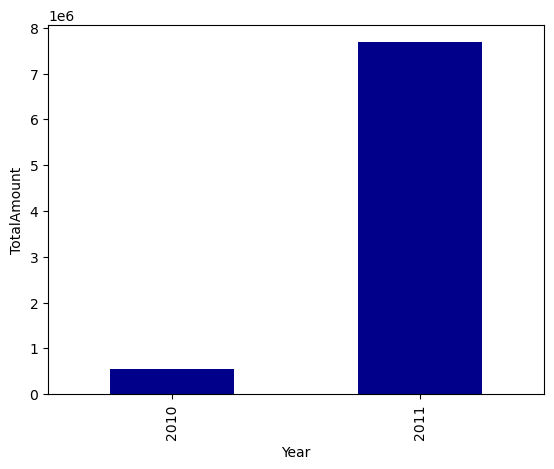

In [15]:
# Total Sales According to the Years
My_data.groupby('Year')['TotalAmount'].sum().plot(kind = 'bar', color='darkblue')
plt.pyplot.ylabel('TotalAmount')

### Why the sales are low in Year 2010

<AxesSubplot:title={'center':'Sales Month Wise'}, xlabel='Year,Month'>

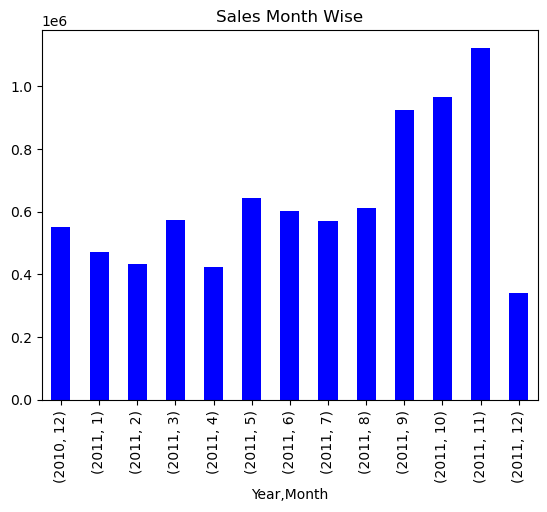

In [16]:
# Checking the Sales of the products for different months

My_data['Month'] = My_data['InvoiceDate'].dt.month
My_data['Month_name'] = My_data['InvoiceDate'].dt.month_name()
My_data.groupby(['Year','Month'])['TotalAmount'].sum().plot(kind = 'bar', title = 'Sales Month Wise',color = 'blue')

### Total Sales of Each Product in the Transcation Dataset

In [17]:
total_sales = My_data.groupby(['StockCode','Description'])['Quantity','TotalAmount'].sum().sort_values(by = 'Quantity',ascending = False)
total_sales

C:\Users\DELL\AppData\Local\Temp\ipykernel_1668\2008709600.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_sales = My_data.groupby(['StockCode','Description'])['Quantity','TotalAmount'].sum().sort_values(by = 'Quantity',ascending = False)


,,Quantity,TotalAmount
StockCode,Description,,
84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215,13332.33
85099B,JUMBO BAG RED RETROSPOT,45066,83236.76
84879,ASSORTED COLOUR BIRD ORNAMENT,35314,56499.22
85123A,WHITE HANGING HEART T-LIGHT HOLDER,34147,93823.85
21212,PACK OF 72 RETROSPOT CAKE CASES,33409,16247.95
...,...,...,...
21144,PINK POODLE HANGING DECORATION,-12,-4.56
CRUK,CRUK Commission,-16,-7933.43
21645,ASSORTED TUTTI FRUTTI ROUND BOX,-24,-39.60


# Market Basket Analysis

In [18]:
# Display the data
My_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalAmount,Country,Invoice_Date,Invoice_Time,Year,Month,Month_name
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,15.30,United Kingdom,2010-12-01,08:26:00.0000000,2010,12,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,20.34,United Kingdom,2010-12-01,08:26:00.0000000,2010,12,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,22.00,United Kingdom,2010-12-01,08:26:00.0000000,2010,12,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,20.34,United Kingdom,2010-12-01,08:26:00.0000000,2010,12,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,20.34,United Kingdom,2010-12-01,08:26:00.0000000,2010,12,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405628,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,10.20,France,2011-12-09,12:50:00.0000000,2011,12,December
405629,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,12.60,France,2011-12-09,12:50:00.0000000,2011,12,December
405630,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,16.60,France,2011-12-09,12:50:00.0000000,2011,12,December
405631,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,16.60,France,2011-12-09,12:50:00.0000000,2011,12,December


### Making a Transcation Basket 

In [19]:
My_basket = (My_data.groupby(['InvoiceNo','Description'])['Quantity']
             .sum().unstack().reset_index().fillna(0)
             .set_index('InvoiceNo'))

### Veiwing The Transcation Basket

In [20]:
My_basket

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C581484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C581490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-11.0,0.0,0.0,0.0,0.0
C581499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Converting all positive Values to 1 and everything else to 0 

In [21]:
def my_encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
My_basket_sets = My_basket.applymap(my_encode_units)
My_basket_sets.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Training Model

In [22]:
# Generating Frequent Itemsets

My_frequent_itemsets = apriori(My_basket_sets, min_support=0.02, use_colnames=True)


C:\Users\DELL\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [23]:
# Generating Rules

My_rules = association_rules(My_frequent_itemsets, metric="lift", min_threshold=1)

In [24]:
# Viewing Top 100 Rules

My_rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.039734,0.035747,0.024012,0.604333,16.906004,0.022592,2.437032,0.979780
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.035747,0.039734,0.024012,0.671736,16.906004,0.022592,2.925290,0.975728
2,(GARDENERS KNEELING PAD KEEP CALM),(GARDENERS KNEELING PAD CUP OF TEA),0.034252,0.028769,0.020977,0.612434,21.287622,0.019991,2.505974,0.986825
3,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.028769,0.034252,0.020977,0.729134,21.287622,0.019991,3.565409,0.981255
4,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.025190,0.031307,0.020841,0.827338,26.426928,0.020052,5.610349,0.987023
5,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.031307,0.025190,0.020841,0.665702,26.426928,0.020052,2.915989,0.993255
6,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.035475,0.031307,0.024511,0.690932,22.069838,0.023400,3.134243,0.989802
7,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.031307,0.035475,0.024511,0.782923,22.069838,0.023400,4.443246,0.985543
8,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.072490,0.039462,0.024737,0.341250,8.647612,0.021877,1.458123,0.953479
9,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.039462,0.072490,0.024737,0.626866,8.647612,0.021877,2.485727,0.920693


###   Frequencies of  the Products

In [25]:
My_basket_sets['ALARM CLOCK BAKELIKE RED'].sum()

877

In [26]:
My_basket_sets['ALARM CLOCK BAKELIKE GREEN'].sum()

789

In [27]:
My_basket_sets['JUMBO BAG RED RETROSPOT'].sum()

1600

In [28]:
My_basket_sets['JUMBO BAG PINK POLKADOT'].sum()

871

### Filtering the Association Rules between the Products

In [29]:
My_rules[(My_rules['lift'] >= 5) & (My_rules['confidence'] >= 0.4)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.039734,0.035747,0.024012,0.604333,16.906004,0.022592,2.437032,0.979780
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.035747,0.039734,0.024012,0.671736,16.906004,0.022592,2.925290,0.975728
2,(GARDENERS KNEELING PAD KEEP CALM),(GARDENERS KNEELING PAD CUP OF TEA),0.034252,0.028769,0.020977,0.612434,21.287622,0.019991,2.505974,0.986825
3,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.028769,0.034252,0.020977,0.729134,21.287622,0.019991,3.565409,0.981255
4,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.025190,0.031307,0.020841,0.827338,26.426928,0.020052,5.610349,0.987023
5,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.031307,0.025190,0.020841,0.665702,26.426928,0.020052,2.915989,0.993255
6,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.035475,0.031307,0.024511,0.690932,22.069838,0.023400,3.134243,0.989802
7,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.031307,0.035475,0.024511,0.782923,22.069838,0.023400,4.443246,0.985543
9,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.039462,0.072490,0.024737,0.626866,8.647612,0.021877,2.485727,0.920693
10,(LUNCH BAG PINK POLKADOT),(LUNCH BAG BLACK SKULL.),0.042180,0.047662,0.021022,0.498389,10.456690,0.019012,1.898558,0.944194


In [32]:
My_data.to_csv('Updated_Transcation_data.csv', index=False)